In [9]:
import os
from os.path import join as pjoin
import sys
import time
from tqdm.notebook import tqdm
import itertools
import collections
from datetime import datetime
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import scipy
from matplotlib_venn import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

---

### Загрузка данных

In [8]:
DATA_PATH = '../data/raw'

In [53]:
def string_to_list(x): return [int(elem) if str(elem).lower() != 'nan' else None for elem in str(x).strip().split()]

In [54]:
print("reviews"+"_"*70)
reviews_df = pd.read_csv(pjoin(DATA_PATH, 'reviews.csv'))
print(f'{reviews_df.shape[0]:,} x {reviews_df.shape[1]:,}')
display(reviews_df.head())

print("\n"+"users"+"_"*70)
users_df = pd.read_csv(pjoin(DATA_PATH, 'users.csv'))
print(f'{users_df.shape[0]:,} x {users_df.shape[1]:,}')
display(users_df.head())

print("\n"+"rubrics"+"_"*70)
rubrics_df = pd.read_csv(pjoin(DATA_PATH, 'rubrics.csv'))
print(f'{rubrics_df.shape[0]:,} x {rubrics_df.shape[1]:,}')
display(rubrics_df.head())

print("\n"+"features"+"_"*70)
features_df = pd.read_csv(pjoin(DATA_PATH, 'features.csv'))
print(f'{features_df.shape[0]:,} x {features_df.shape[1]:,}')
display(features_df.head())

print("\n"+"organisations"+"_"*70)
organisations_df = pd.read_csv(pjoin(DATA_PATH, 'organisations.csv'))
organisations_df.rubrics_id = organisations_df.rubrics_id.apply(lambda x: string_to_list(x))
organisations_df.features_id = organisations_df.features_id.apply(lambda x: string_to_list(x))
print(f'{organisations_df.shape[0]:,} x {organisations_df.shape[1]:,}')
display(organisations_df.head())

print("\n"+"aspects"+"_"*70)
aspects_df = pd.read_csv(pjoin(DATA_PATH, 'aspects.csv'))
print(f'{aspects_df.shape[0]:,} x {aspects_df.shape[1]:,}')
display(aspects_df.head())

print("\n"+"test_users"+"_"*70)
test_users_df = pd.read_csv(pjoin(DATA_PATH, 'test_users.csv'))
print(f'{test_users_df.shape[0]:,} x {test_users_df.shape[1]:,}')
display(test_users_df.head())

reviews______________________________________________________________________
3,640,835 x 5


,user_id,org_id,rating,ts,aspects
0,16998268288908323644,7184895086928047809,2.0,105,NaN
1,12235230637700316274,11420440322893824394,3.0,890,17
2,2706795762761414590,11993738663105455885,3.0,936,NaN
3,2522006254806484630,18200844491365025705,3.0,1048,6
4,2035736119522953868,7143808482480365209,5.0,1185,NaN



users______________________________________________________________________
1,252,801 x 2


,user_id,city
0,523295021912509756,msk
1,11952159487361099606,msk
2,16879036589969590999,msk
3,12791716990148606332,msk
4,11642393216024958726,msk



rubrics______________________________________________________________________
15 x 2


,rubric_id,rubric_name
0,30519,"Булочная, пекарня"
1,30770,"Бар, паб"
2,30771,Быстрое питание
3,30774,Кафе
4,30775,Пиццерия



features______________________________________________________________________
63 x 2


,feature_id,feature_name
0,246,karaoke
1,256,vip_zone
2,288,accepted_credit_cards
3,444,has_restaurant
4,447,air_conditioning



organisations______________________________________________________________________
66,405 x 6


,org_id,city,average_bill,rating,rubrics_id,features_id
0,16848414477362211020,spb,1000.0,4.479702,"[30776, 31375]","[1018, 1509, 11177, 11617, 11629, 11704, 11867..."
1,1430604733320164116,spb,1000.0,4.514509,"[30776, 30770]","[246, 1018, 11617, 11629, 11704, 11867, 20422,..."
2,9880309324224147401,spb,1000.0,3.884615,"[30770, 30774]","[1018, 11177, 11617, 11629, 11704, 11867, 2042..."
3,5617879987171966456,spb,1000.0,NaN,"[30774, 30775]","[1018, 1509, 10596, 11177, 11629, 11634, 11704..."
4,5241461680470612149,spb,1000.0,4.532468,[30776],"[1018, 11177, 11617, 11629, 11704, 11867, 2042..."



aspects______________________________________________________________________
141 x 2


,aspect_id,aspect_name
0,1,Бургеры
1,2,Чистота
2,3,Интерьер
3,4,Еда
4,5,Напитки



test_users______________________________________________________________________
16,967 x 1


,user_id
0,3545210947248911048
1,15271987121288045390
2,15016858616184265932
3,12457244142928722989
4,13339684649926251468


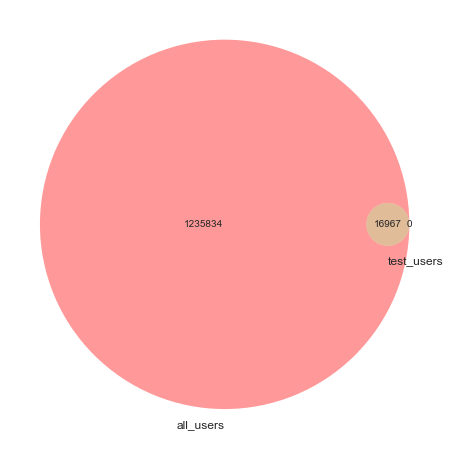

In [32]:
venn2(
    subsets=[set(users_df['user_id']), set(test_users_df['user_id'])],
    set_labels=['all_users', 'test_users']
);

In [46]:
print('All users city:')
print(users_df['city'].value_counts().apply(lambda x: f"{x:,}"))
print('\nTest users city:')
print(users_df.merge(test_users_df, on=['user_id'], how='inner')['city'].value_counts().apply(lambda x: f"{x:,}"))

All users city:
msk    912,276
spb    340,525
Name: city, dtype: object

Test users city:
msk    14,638
spb     2,329
Name: city, dtype: object
